# Predicting Time Series Data with Machine Learning, Generative AI, and Deep Learning

## Introduction
Time series data prediction is a critical aspect of various industries, ranging from finance and healthcare to marketing and logistics. The ability to forecast future values based on historical data can drive significant improvements in decision-making processes and operational efficiency. With advancements in machine learning (ML), generative AI, and deep learning (DL), there are now more sophisticated methods available for tackling time series prediction problems. Here we explore different approaches and models that can be used for time series data prediction.

## Understanding Time Series Data
Time series data is a sequence of data points collected or recorded at specific time intervals. Examples include stock prices, weahter data, sales figures, and sensor readings. The goal of time series prediction is to use past observations to predict future values, which can be challenging due to the inherent complexities and patterns within the data.

### 1. Machine Learning Approaches

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import itertools

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load your time series data
time_series_data = pd.read_csv('TEC_JR055_03_2024.csv')
time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])
time_series_data.set_index('Date', inplace=True)
time_series_data.head()

,CS,TEC
Date,,
2024-03-01 00:03:16+00:00,70,2.5
2024-03-01 00:08:16+00:00,90,2.4
2024-03-01 00:13:16+00:00,40,2.8
2024-03-01 00:18:16+00:00,60,3.3
2024-03-01 00:23:16+00:00,40,1.7


#### 1.1 ARIMA (AutoRegressive Integrated Moving Average
ARIMA is a classical statistical method for time series forecasting. It combines autoregressive (AR) models, differencing (to make the data stationary), and moving average (MA) models.

In [3]:
# Select subset of data 3 days
train_data = time_series_data.loc['2024-03-01':'2024-03-04']
test_data = time_series_data.loc['2024-03-05':'2024-03-06']

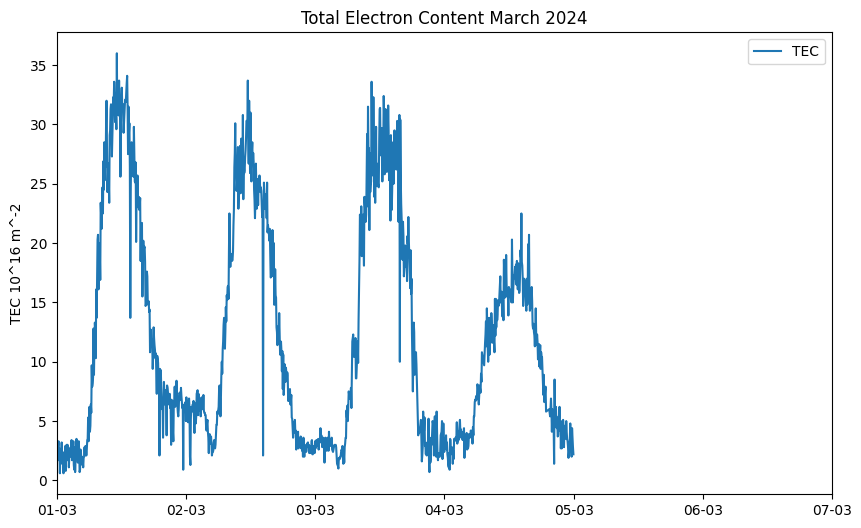

In [4]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['TEC'], label='TEC')

plt.ylabel('TEC 10^16 m^-2')
plt.title('Total Electron Content March 2024')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
start_date = datetime(2024, 3, 1)
end_date = datetime(2024, 3, 7)
plt.xlim(start_date, end_date)

plt.legend()
plt.show()

In [5]:
# Fit ARIMA model
p, d, q = 1, 0, 1  # Adjusted parameters
model = ARIMA(train_data['TEC'], order=(p, d, q))
model_fit = model.fit()

In [6]:
# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    TEC   No. Observations:                 1090
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2344.438
Date:                Tue, 10 Sep 2024   AIC                           4696.877
Time:                        11:24:16   BIC                           4716.852
Sample:                             0   HQIC                          4704.437
                               - 1090                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4062      8.026      1.172      0.241      -6.325      25.137
ar.L1          0.9953      0.003    307.302      0.000       0.989       1.002
ma.L1         -0.5649      0.013    -42.547      0.0

In [7]:
# Forecast future values
forecast_steps = 48  # Forecast for the next 24 hours
forecast = model_fit.forecast(steps=forecast_steps)
forecast_dates = [train_data.index[-1] + timedelta(hours=i) for i in range(1, forecast_steps +1)]

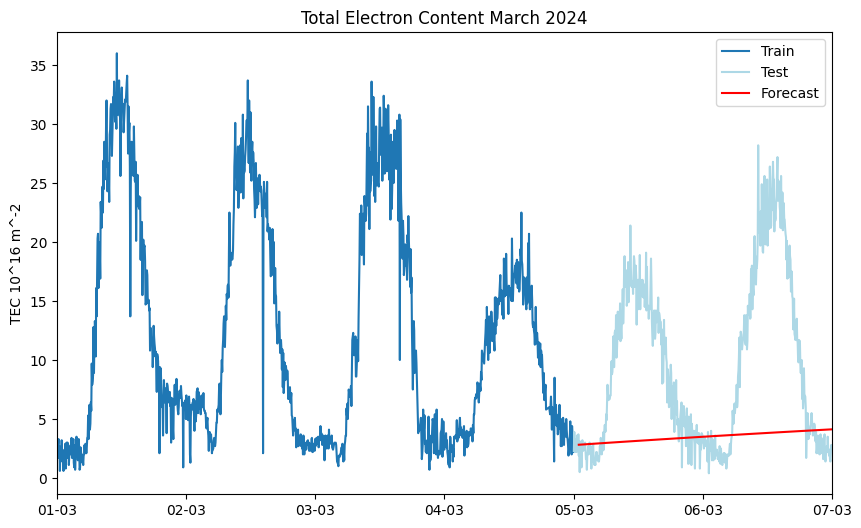

In [8]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['TEC'], label='Train')
plt.plot(test_data.index, test_data['TEC'], label='Test', color='lightblue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')

plt.ylabel('TEC 10^16 m^-2')
plt.title('Total Electron Content March 2024')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
start_date = datetime(2024, 3, 1)
end_date = datetime(2024, 3, 7)
plt.xlim(start_date, end_date)

plt.legend()
plt.show()

#### 1.2 SARIMA (Seasonal ARIMA)
SARIMA exteds ARIMA by considering seasonal effects. It's useful for data with seasonal patterns, such as monthly sales data.

In [9]:
# Define the parameters for Sarima model
p = d = q = range(0,3)
P = D = Q = range(0,2)
s = [24]  # Adjust to 365 for dayly data

In [10]:
# Generate all combinations of data parameters
pdq = list(itertools.product(p,d,q))
seasonal_pdq = list(itertools.product(P, D, Q, s))

In [11]:
# Grid Search: Iterate over all combinations and fit the SARIMA model
best_aic = np.inf
best_params = None
y = train_data['TEC']

for param in pdq:
    print(param)
    for seasonal_param in seasonal_pdq:
        #print(seasonal_param)
        try:
            model = SARIMAX(y,
                            order=param,
                            seasonal_order=seasonal_param,
                            enformce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit()
            #print(results.aic)
            if results.aic < best_aic:
                #print(results.aic)
                best_aic = results.aic
                best_params = (param, seasonal_param)
        except:
            continue

print(f'Best SARIMA parameters: {best_params} with AIC: {best_aic}')

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(2, 2, 0)
(2, 2, 1)
(2, 2, 2)
Best SARIMA parameters: ((2, 1, 2), (0, 1, 1, 24)) with AIC: 4633.697898890698


In [12]:
# Fit SARIMA model
p, d, q = 2, 1, 2  # Adjusted parameters
P, D, Q, s = 0, 1, 1, 288  # Seasonal parameters
model = SARIMAX(train_data['TEC'], order=(p, d, q), seasonal_order = (P, D, Q, s))
model_fit = model.fit(disp=False)

In [13]:
# Forecast future values
forecast_steps = 24  # Forecast for the next 24 hours
forecast = model_fit.forecast(steps=forecast_steps)
forecast_dates = [train_data.index[-1] + timedelta(hours=i) for i in range(1, forecast_steps +1)]

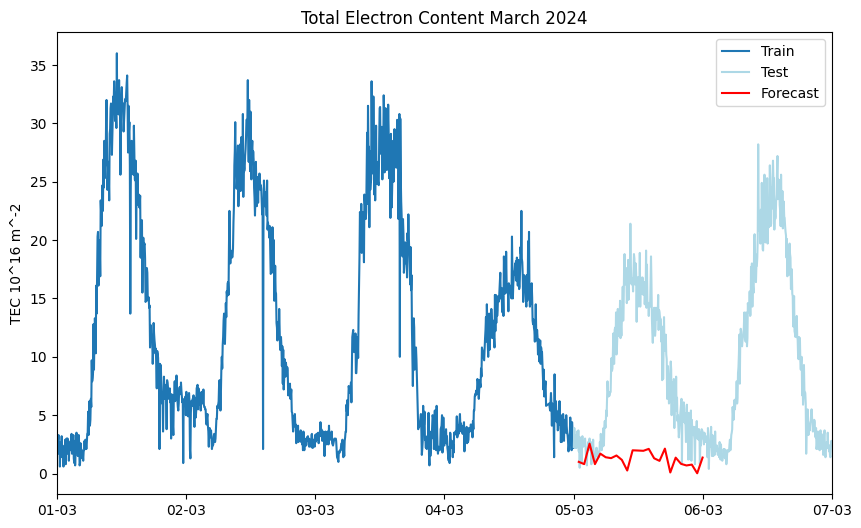

In [14]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['TEC'], label='Train')
plt.plot(test_data.index, test_data['TEC'], label='Test', color='lightblue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')

plt.ylabel('TEC 10^16 m^-2')
plt.title('Total Electron Content March 2024')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
start_date = datetime(2024, 3, 1)
end_date = datetime(2024, 3, 7)
plt.xlim(start_date, end_date)

plt.legend()
plt.show()

#### 1.3 PROPHET
Developed by Facebook, prophet is a powerful tool designed for forecasting time series data that can handle missing data and outliers and provide reliable uncetainty intervals. The equeation for the model is y(t) = g(t) + h(t) + s(t) +et where:
- y(t) is the Additive regressive model
- g(t) is the Trend factor
- h(t) is the Holiday component
- s(t) is the Seasonality component
- et is the Error term

In [ ]:
# Problems installing fbprophet lib
from fbprophet import Prophet

# Fit Prophet model
model = Prophet()
model.fit(train_data['TEC'])

# Make future dataframe and predictions
future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])